<a href="https://colab.research.google.com/github/alhassan069/machine_learning_evaluation/blob/main/evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc,ConfusionMatrixDisplay

In [111]:
# Part A: Data Preprocessing
# Load the dataset into a Pandas DataFrame.

# Perform exploratory data analysis (EDA):

# Show the first 5 rows.

# Check for missing values.

# Display basic statistics (mean, std, etc.).

df = pd.read_csv('diabetes.csv')
print("First 5 rows")
display(df.head())
print("Missing values")
display(df.isnull().sum())
print("Basic statistics")
display(df.describe())

First 5 rows


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Missing values


,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


Basic statistics


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [112]:
# Split the data into train (70%) and test (30%) sets.
X = df.drop('Outcome', axis=1)
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
display(X_train.head())
display(y_train.head())

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
334,1,95,60,18,58,23.9,0.260,22
139,5,105,72,29,325,36.9,0.159,28
485,0,135,68,42,250,42.3,0.365,24
547,4,131,68,21,166,33.1,0.160,28
18,1,103,30,38,83,43.3,0.183,33


,Outcome
334,0
139,0
485,1
547,0
18,0


In [113]:
# ### Part B: Logistic Regression

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

Accuracy: 0.7359307359307359
Precision: 0.6172839506172839
Recall: 0.625
F1-score: 0.6211180124223602


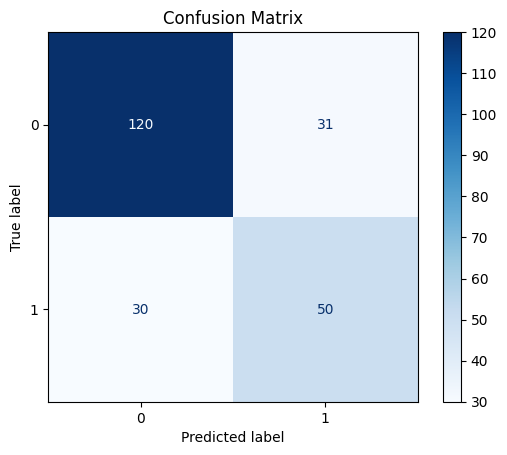

In [114]:


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

cm = confusion_matrix(y_test, y_pred)
confusionMatrix = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg.classes_)
confusionMatrix.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

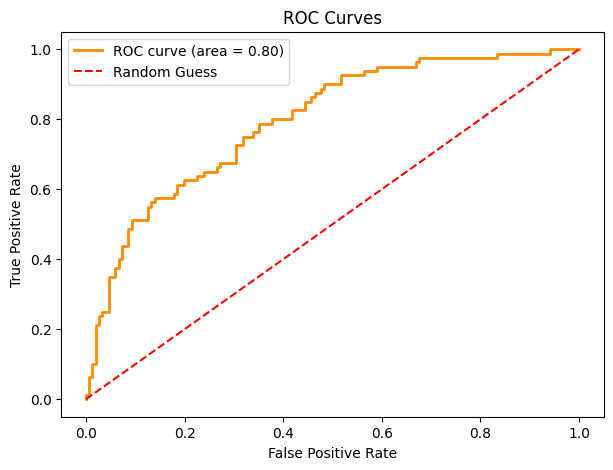

In [115]:

# ROC Curve & AUC Score
y_pred_proba = logreg.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)



plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'r--', label='Random Guess')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.show()

Guiding Question:

Why is AUC-ROC a better evaluation metric than just accuracy in imbalanced datasets?

Answer: This metric considers the trade-offs between precision and recall, while Accuracy only looks at how many predictions are correct.

In [116]:
# Part C: Decision Tree Classifier
# Train a Decision Tree Classifier (use max_depth = 4).

# Predict on the test set.

# Calculate the same metrics as Logistic Regression.

# Plot the Decision Tree and interpret the first split (which feature did it choose and why?).

# Guiding Question:

# Compare the Decision Tree’s interpretability vs. Logistic Regression’s coefficients.

# Which one would you prefer in a medical diagnosis scenario? Why?


dtc = DecisionTreeClassifier(max_depth=4)
dtc.fit(X_train, y_train)
y_pred_dtc = dtc.predict(X_test)



Accuracy: 0.70995670995671
Precision: 0.5585585585585585
Recall: 0.775
F1-score: 0.6492146596858639


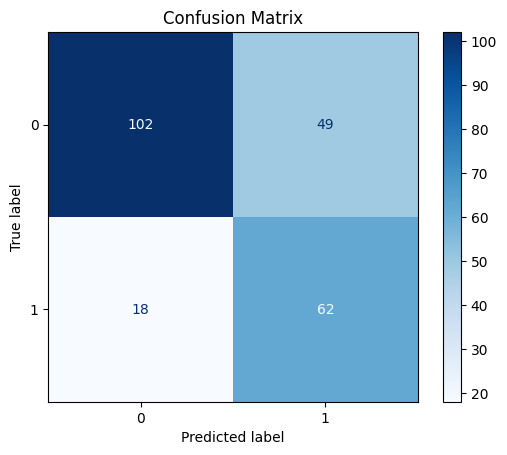

In [117]:


accuracy = accuracy_score(y_test, y_pred_dtc)
precision = precision_score(y_test, y_pred_dtc)
recall = recall_score(y_test, y_pred_dtc)
f1 = f1_score(y_test, y_pred_dtc)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

confusion_matrix_dtc = confusion_matrix(y_test, y_pred_dtc)
confusionMatrix_dtc = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_dtc, display_labels=logreg.classes_)
confusionMatrix_dtc.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

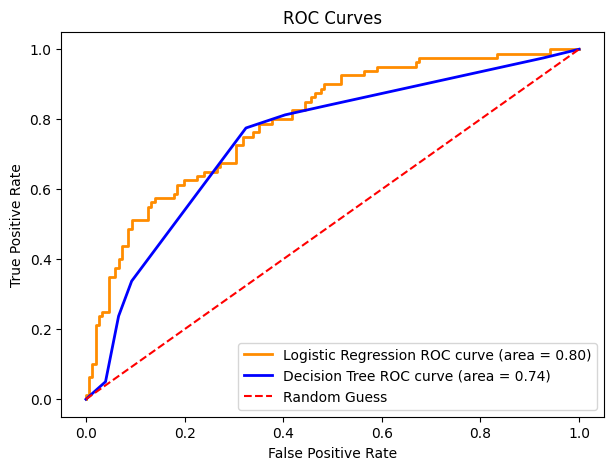

In [118]:
# ROC Curve & AUC Score
y_pred_proba_dtc = dtc.predict_proba(X_test)[:, 1]
fpr_dtc, tpr_dtc, thresholds_dtc = roc_curve(y_test, y_pred_proba_dtc)
roc_auc_score = auc(fpr_dtc, tpr_dtc)



plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Logistic Regression ROC curve (area = %0.2f)' % roc_auc)
plt.plot(fpr_dtc, tpr_dtc, color='blue', lw=2, label='Decision Tree ROC curve (area = %0.2f)' % roc_auc_score)
plt.plot([0, 1], [0, 1], 'r--', label='Random Guess')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.show()

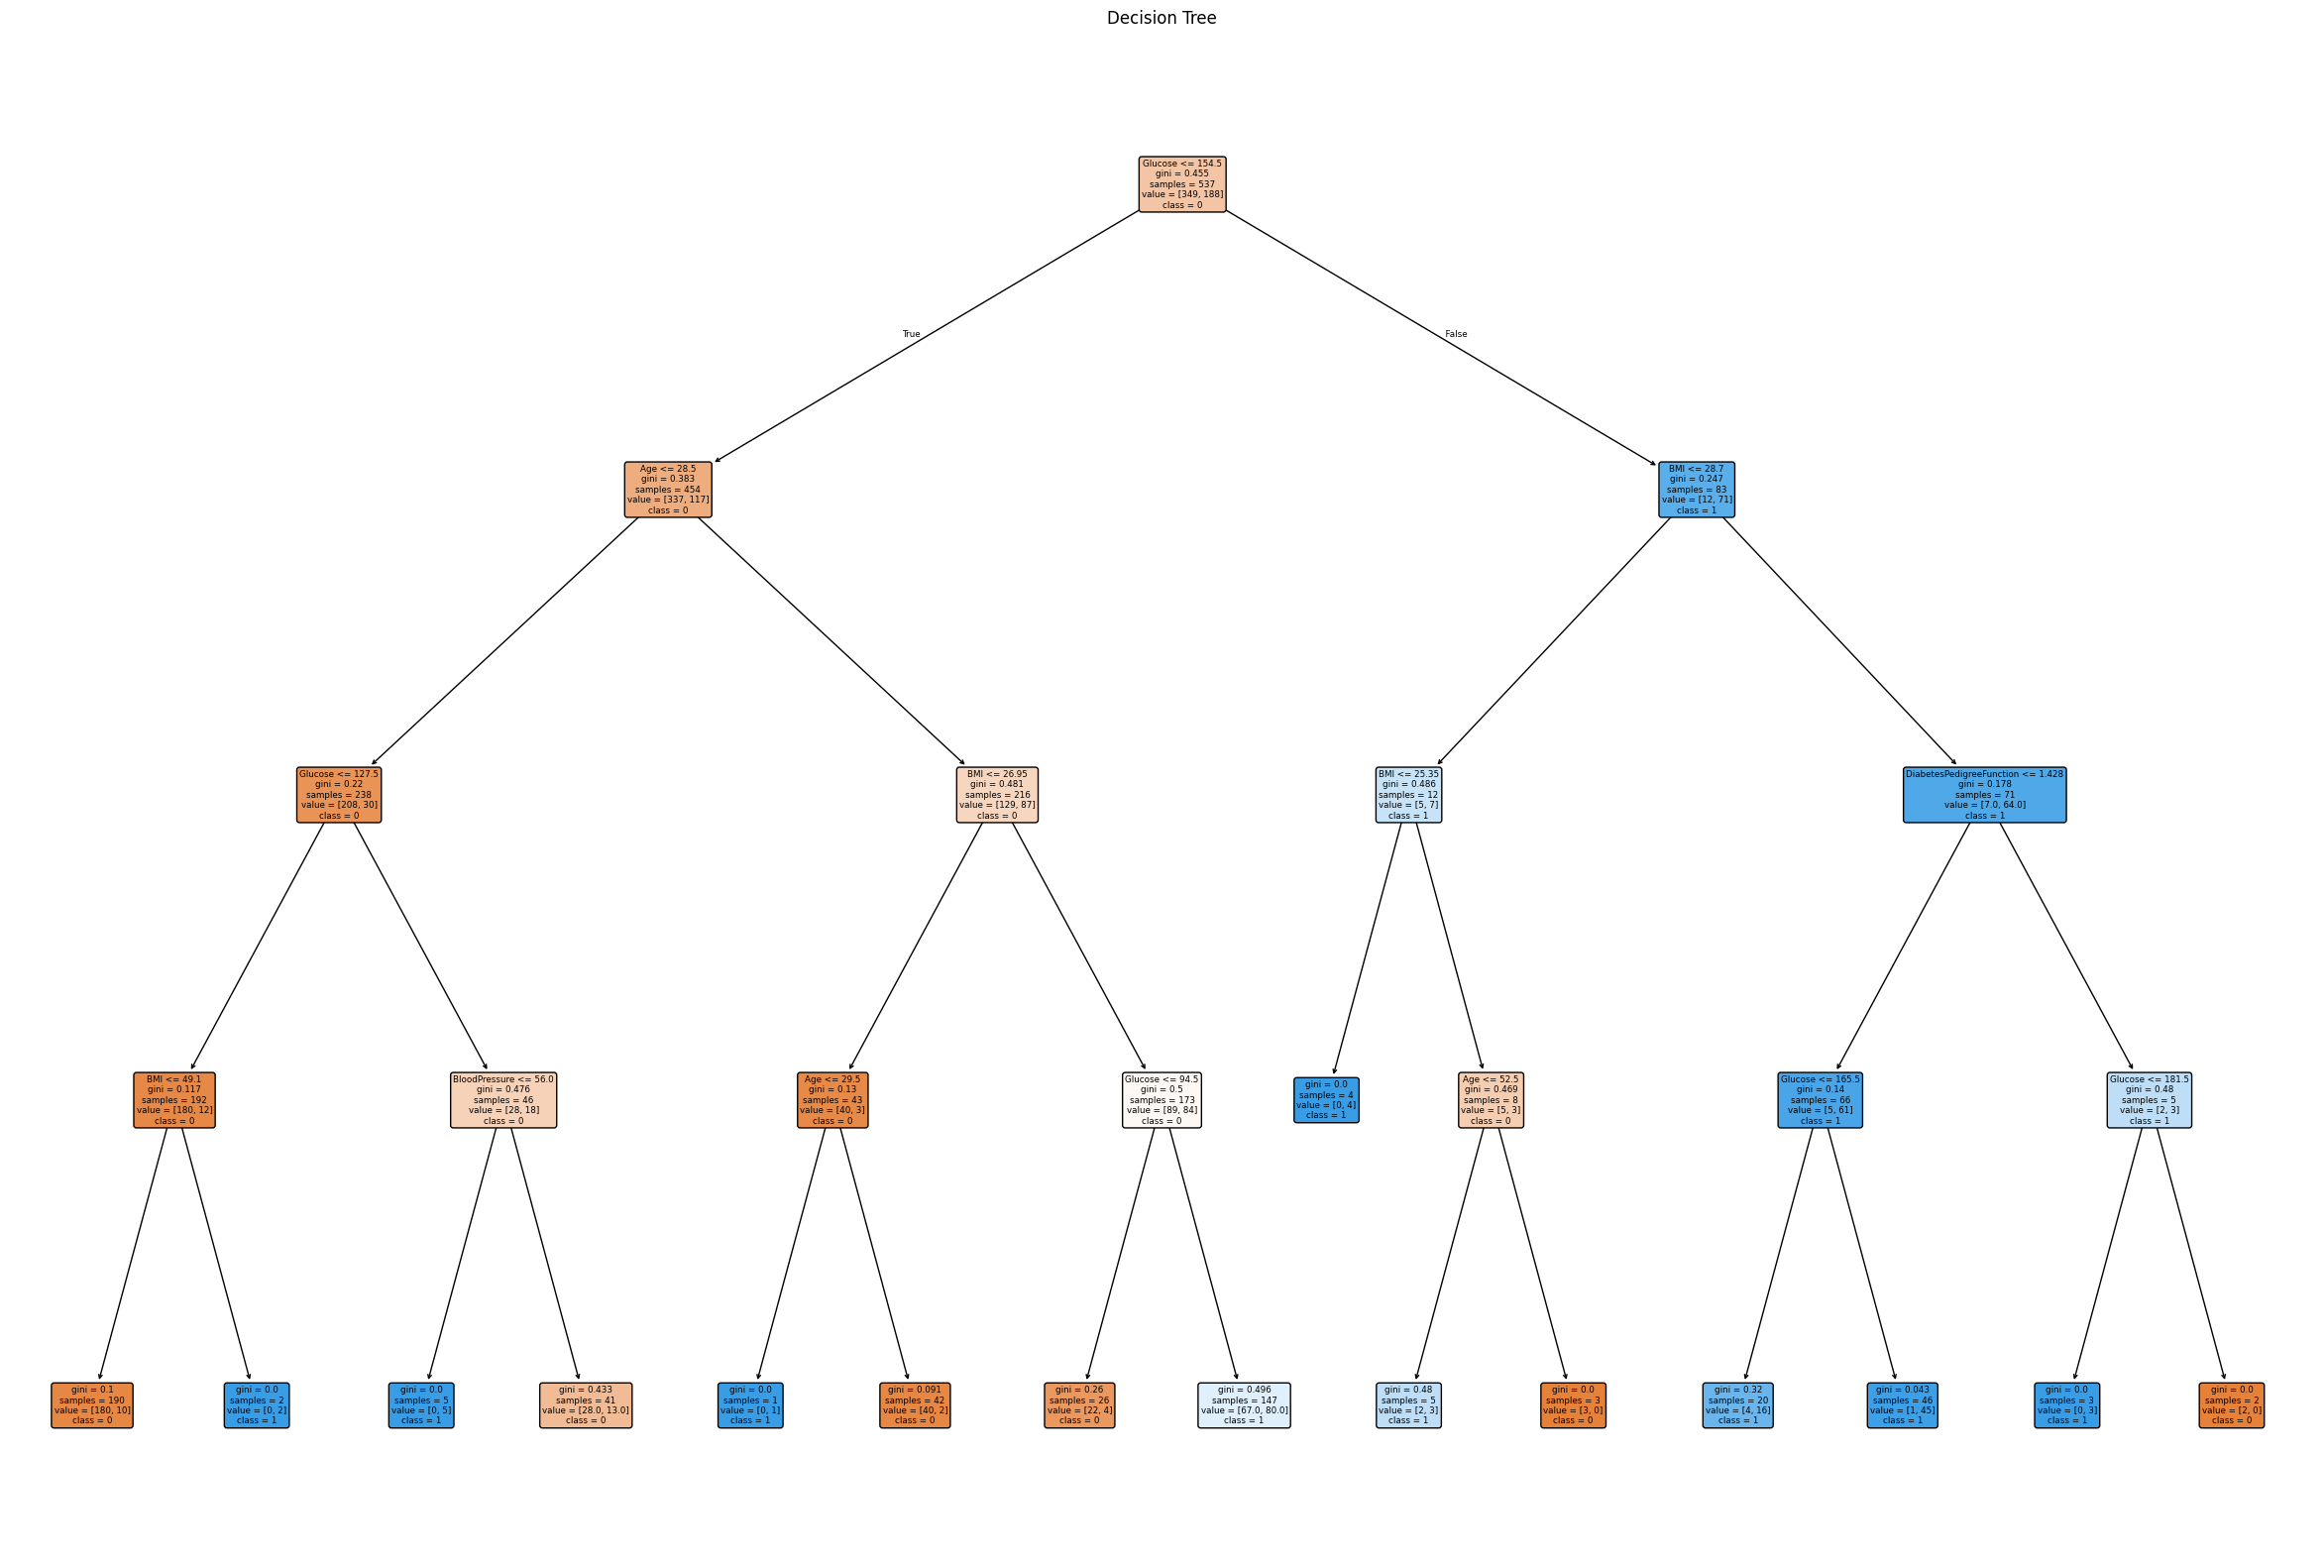

In [119]:
# Plot the Decision Tree and interpret the first split (which feature did it choose and why?).

plt.figure(figsize=(30, 20)) # Adjust figure size for better readability
plot_tree(dtc, filled=True, feature_names=X_train.columns, rounded=True, class_names=['0', '1'])
plt.title("Decision Tree")
plt.show()
# It chose glucose as anticipated.

Guiding Question:

Compare the Decision Tree’s interpretability vs. Logistic Regression’s coefficients.

Which one would you prefer in a medical diagnosis scenario? Why?


Answer: I would choose Decision Tree because it is more interpretable. And it works just like a doctor would go through the process.


### Part D: Comparison & Reflection

Which model performs better?
Answer: Linear Regression

Which model is easier to interpret for doctors?
Answer: Decision Tree

If the dataset is slightly imbalanced (more 0’s than 1’s), which metric (Precision or Recall) should be prioritized in diagnosing diabetes? Why?

Answer:
For an imbalanced dataset with more "0's" (non-diabetic) than "1's" (diabetic), recall should be prioritized over precision when diagnosing diabetes. This is because high recall minimizes the number of false negatives, ensuring fewer diabetic patients are misclassified as non-diabetic, which is a more severe consequence in healthcare than a false positive (misclassifying a non-diabetic as diabetic).
